# CNN U-Net for classifiying tree 3 [Binary Classifier]

We will be classifying a specific tree (arborus verdesus :P).

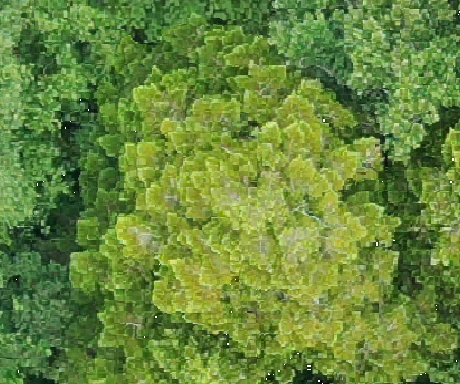
<!-- <center>
    <div>
        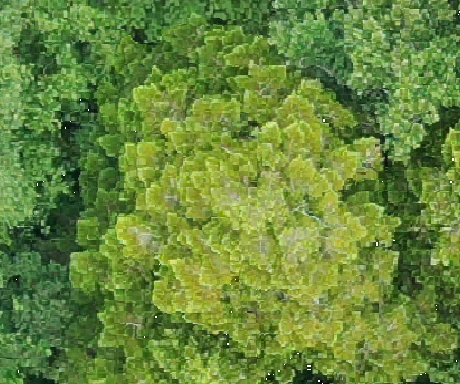
    </div>
</center> -->

I will be using the whole image because we need the results to stay georeferenced so we can interpret the results visually.

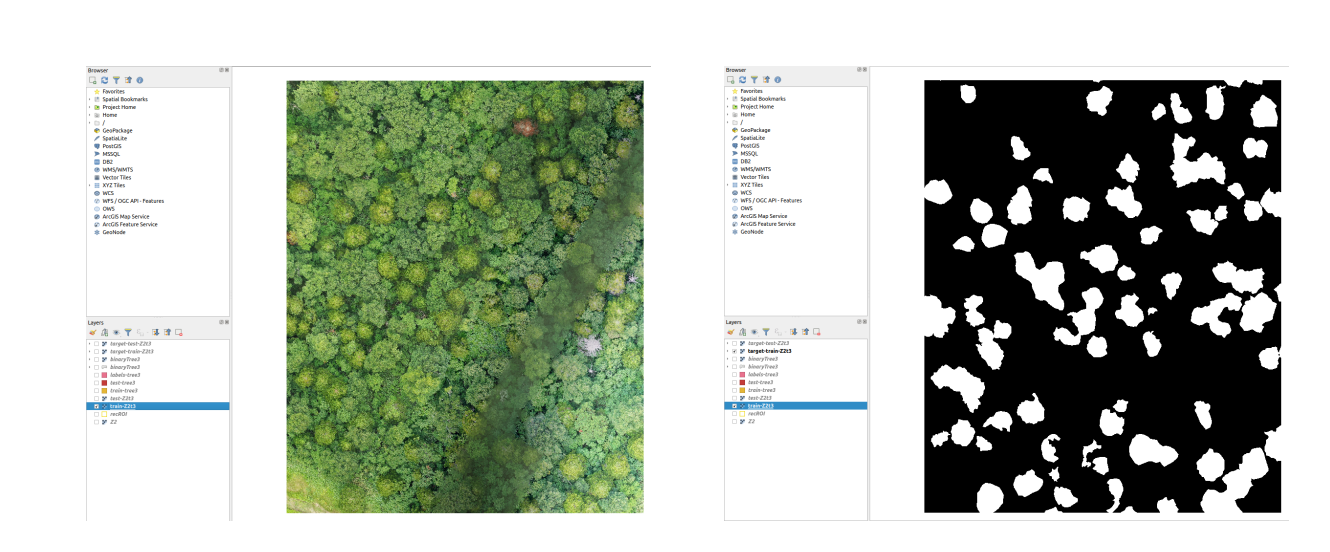
<!-- <center>
    <div>
        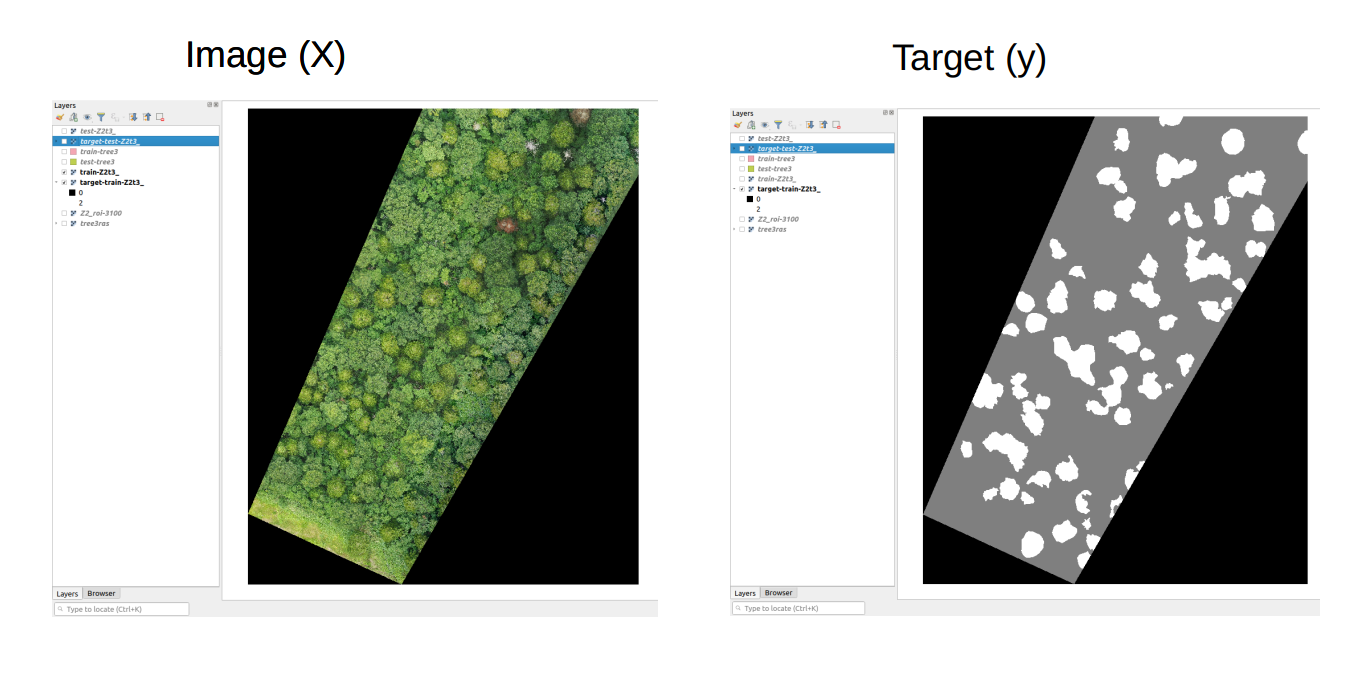
    </div>
</center> -->

Adapted U-net CNN-architecture for the tree species segmentation (Ronneberger et al., 2015). This scheme illustrates how 128 × 128 pixel tiles were analyzed. Values on top of the boxes depict the number of calculated feature maps with the respective x-y-dimensions as vertically oriented labels.

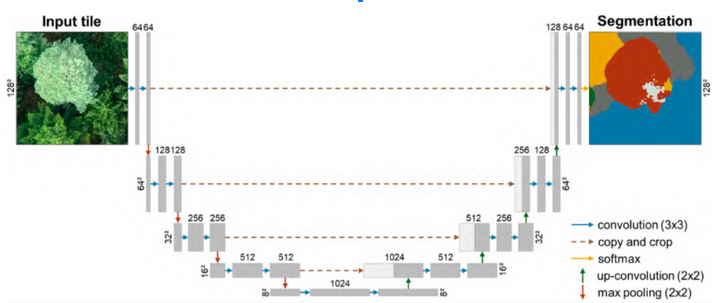
<!-- <center>
    <div>
        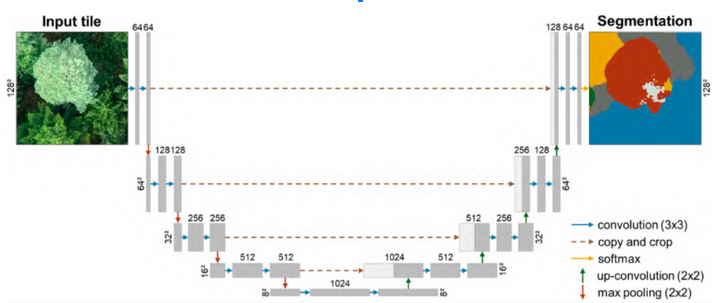
    </div>
</center> -->

Importing the necessary libraries that will allow us to:
* `os`: allow interactions with the os (creating and removing a directory (folder), fetching its contents, changing and identifying the current directory, etc... [Link](https://docs.python.org/3/library/os.html)

* `PIL`: Python Imaging Library is the de facto image processing package for Python language. It incorporates lightweight image processing tools that aids in editing, creating and saving images. [Link](https://pillow.readthedocs.io/en/stable/)

* `cv2`: Pre-built CPU-only OpenCV(OpenCV (Open Source Computer Vision Library is an open source computer vision and machine learning software library.) packages for Python. [Link](https://pypi.org/project/opencv-python/)

* `numpy`: NumPy is very useful for performing mathematical and logical operations on arrays. It provides an abundance of useful features for operations on n-arrays and matrices in Python ... [Link](https://numpy.org/)

* `matplotlib`: Matplotlib is a complete library for creating static, animated and interactive visualizations in Python. Matplotlib makes the easy things easy and the hard things possible. [Link](https://matplotlib.org/)

* `tensorflow`: TensorFlow is an end-to-end open source platform for machine learning. It has a comprehensive, flexible ecosystem of tools, libraries and community resources that lets researchers push the state-of-the-art in ML and developers easily build and deploy ML powered applications. [Link](https://www.tensorflow.org)

In [1]:
# Import des modules Python nécessaires
import os
from PIL import Image
import cv2
import glob
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D

! Be careful to uncomment next line cropped images will be deleted

In [2]:
!sh clearCroppingDir.sh

In [3]:
def crop_images(savedir, filename, save_name):
    img = Image.open(filename)
    width, height = img.size
    w, h = (256, 256)

    frame_num = 1
    for col_i in range(0, width, w):
        for row_i in range(0, height, h):
            crop = img.crop((col_i, row_i, col_i + w, row_i + h))
            save_to = os.path.join(savedir, save_name + "_{:03}.jpg")
            crop.save(save_to.format(frame_num))
            frame_num += 1


crop_images("./Cropped/test", "./Data/test-Z2t3.tif", "test")
crop_images("./Cropped/train", "./Data/train-Z2t3.tif", "train")
crop_images("./Cropped/target-test", "./Data/target-test-Z2t3.tif", "target-test")
crop_images("./Cropped/target-train", "./Data/target-train-Z2t3.tif", "target-train")

In [4]:
files_test = glob.glob("./Cropped/test/*.jpg")
files_test.sort()
files_train = glob.glob("./Cropped/train/*.jpg")
files_train.sort()
files_tar_test = glob.glob("./Cropped/target-test/*.jpg")
files_tar_test.sort()
fileTest = glob.glob("./Data/test-Z2t3.tif")
fileTarTest = glob.glob("./Data/target-test-Z2t3.tif")
files_tar_train = glob.glob("./Cropped/target-train/*.jpg")
files_tar_train.sort()

In [5]:
files_test[:10]

['./Cropped/test/test_001.jpg',
 './Cropped/test/test_002.jpg',
 './Cropped/test/test_003.jpg',
 './Cropped/test/test_004.jpg',
 './Cropped/test/test_005.jpg',
 './Cropped/test/test_006.jpg',
 './Cropped/test/test_007.jpg',
 './Cropped/test/test_008.jpg',
 './Cropped/test/test_009.jpg',
 './Cropped/test/test_010.jpg']

In [6]:
fileTarTest

['./Data/target-test-Z2t3.tif']

Here are the tiles (cropped from original)

Voici image
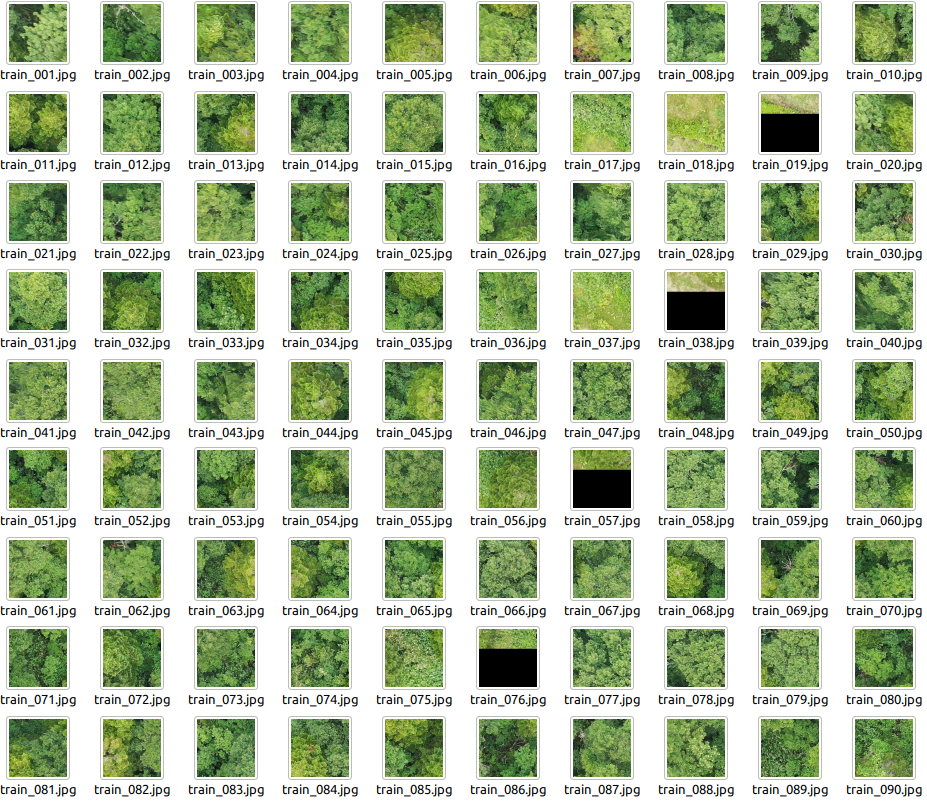

In [7]:
# X = np.array(Image.open("./Data/train-Z2t3_.tif"))
# y = np.array(Image.open("./Data/target-train-Z2t3_.tif"))
X = []
for myFile in files_train:
    image = cv2.imread(myFile)
    X.append(image)

X = np.array(X)
print('X:', X.shape)

X: (357, 256, 256, 3)


In [8]:
y = []
for myFile in files_tar_train:
    image = cv2.imread(myFile)
    y.append(image)

y = np.array(y)
print('y:', y.shape)

y: (357, 256, 256, 3)


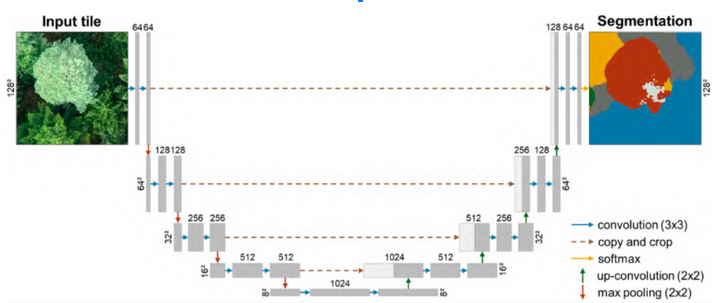
<!-- <center>
    <div>
        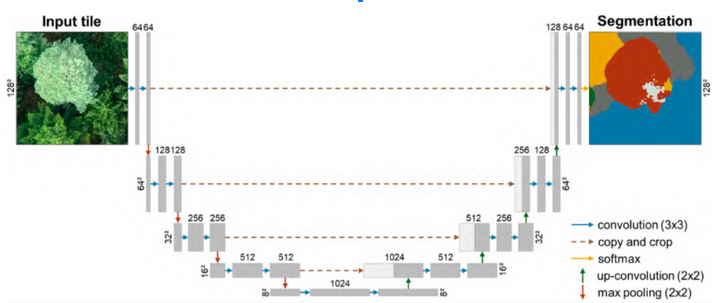
    </div>
</center> -->

In [9]:
# Construction d'un RNA convolutif
CNN = Sequential([Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(256, 256, 3)),
                  Conv2D(64, (3, 3), padding='same', activation='relu'),
                  MaxPooling2D((2, 2)),
                  Conv2D(128, (3, 3), padding='same', activation='relu'),
                  Conv2D(128, (3, 3), padding='same', activation='relu'),
                  MaxPooling2D((2, 2)),
                  Conv2D(256, (3, 3), padding='same', activation='relu'),
                  Conv2D(256, (3, 3), padding='same', activation='relu'),
                  MaxPooling2D((2, 2)),
                  Conv2D(512, (3, 3), padding='same', activation='relu'),
                  Conv2D(512, (3, 3), padding='same', activation='relu'),
                  MaxPooling2D((2, 2)),
                  Conv2D(1024, (3, 3), padding='same', activation='relu'),
                  UpSampling2D(size=(2, 2)),
                  Conv2D(512, (3, 3), padding='same', activation='relu'),
                  Conv2D(512, (3, 3), padding='same', activation='relu'),
                  UpSampling2D(size=(2, 2)),
                  Conv2D(256, (3, 3), padding='same', activation='relu'),
                  Conv2D(256, (3, 3), padding='same', activation='relu'),
                  UpSampling2D(size=(2, 2)),
                  Conv2D(128, (3, 3), padding='same', activation='relu'),
                  Conv2D(128, (3, 3), padding='same', activation='relu'),
                  UpSampling2D(size=(2, 2)),
                  Conv2D(64, (3, 3), padding='same', activation='relu'),
                  Conv2D(64, (3, 3), padding='same', activation='relu'),
                  Conv2D(3, (1, 1), activation='softmax')])
CNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 256)       2

In [10]:
CNN.compile(optimizer='rmsprop',
            loss='binary_crossentropy',
            metrics=['accuracy'])

In [11]:
history_CNN = CNN.fit(X,
                      y,
                      verbose=True,
                      epochs=5,
                      validation_split=0.3)

Epoch 1/5
8/8 [==============================] - 676s 85s/step - loss: 7476554.0000 - accuracy: 0.0119 - val_loss: 0.6815 - val_accuracy: 0.0510
Epoch 2/5
8/8 [==============================] - 659s 83s/step - loss: 1.2160 - accuracy: 0.1673 - val_loss: 2.0947 - val_accuracy: 0.0321
Epoch 3/5
8/8 [==============================] - 647s 81s/step - loss: 1.1045 - accuracy: 0.4807 - val_loss: 0.6416 - val_accuracy: 0.0792
Epoch 4/5
8/8 [==============================] - 675s 86s/step - loss: 0.6929 - accuracy: 0.2344 - val_loss: 0.6334 - val_accuracy: 0.0881
Epoch 5/5
8/8 [==============================] - 690s 87s/step - loss: 0.6472 - accuracy: 0.3937 - val_loss: 0.6512 - val_accuracy: 0.9813


In [12]:
history_CNN.history

{'loss': [7476554.0,
  1.216025948524475,
  1.1045079231262207,
  0.6928532123565674,
  0.6472128629684448],
 'accuracy': [0.011913375928997993,
  0.16728056967258453,
  0.4807279706001282,
  0.2343672215938568,
  0.3937111496925354],
 'val_loss': [0.6814900040626526,
  2.0947165489196777,
  0.64158695936203,
  0.6333819031715393,
  0.6511528491973877],
 'val_accuracy': [0.05098795145750046,
  0.032127946615219116,
  0.07918830960988998,
  0.08806652575731277,
  0.9812894463539124]}

In [13]:
Xtest = []
for myFile in fileTest:
    image = cv2.imread(myFile)
    Xtest.append(image)

Xtest = np.array(Xtest)

ytest = []
for myFile in fileTarTest:
    image = cv2.imread(myFile)
    ytest.append(image)

ytest = np.array(ytest)

In [14]:
y_new = CNN.predict(Xtest)

In [15]:
np.unique(y_new).max()

0.34366682

In [20]:
y_new.shape

(1664, 4272)

All nan ??

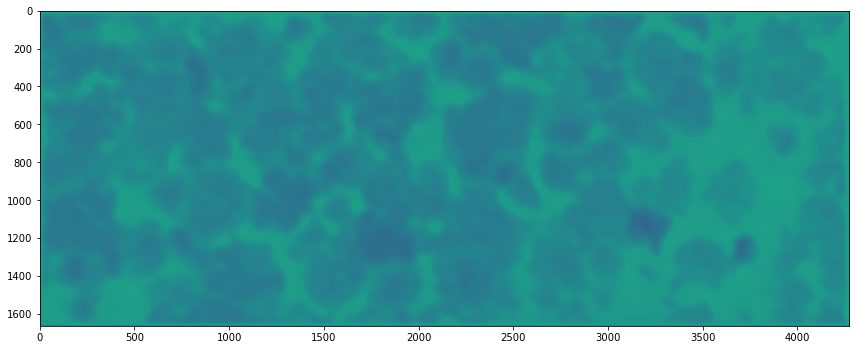

In [37]:
fig, ax = plt.subplots(figsize=(14.5, 8))
pos = ax.imshow(y_new, interpolation='nearest')

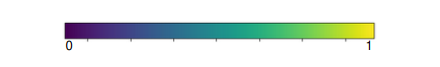

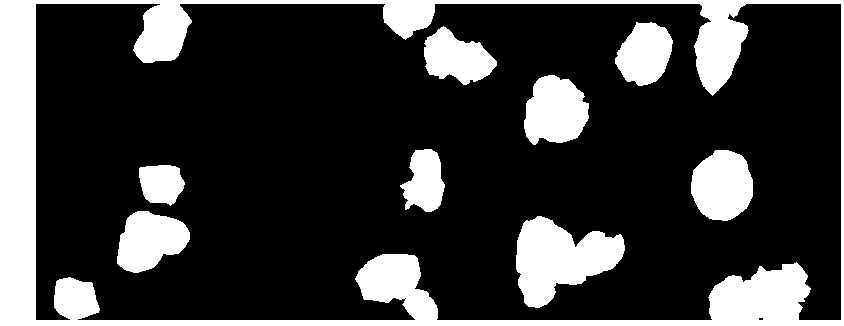

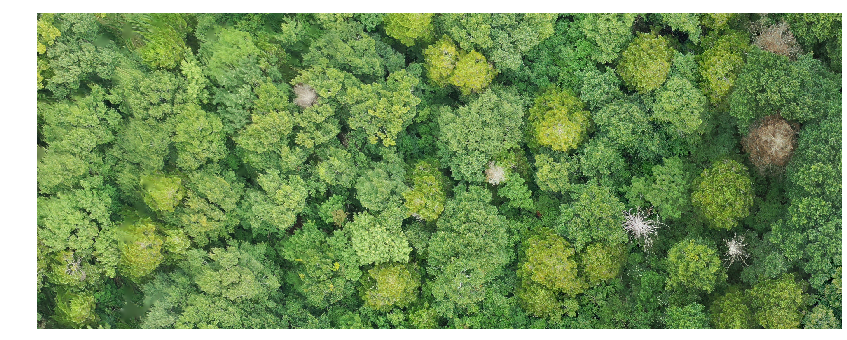